## Example Code

Here, we show how to run the proposed online lasso

In [92]:
import numpy as np
import util
from proposed_method import online_lasso

#### SYSTEM SETTINGS

In [93]:
N = 5000  # Time series length
P = 30  # Total available features
p = 15  # True model order
var_y = 1  # Observation noise variance
var_h = 1  # Feature noise variance
var_t = 1  # Theta noise variance

#### SYNTHETIC DATA

In [94]:
# Generate data and add gaussian noise
y, X, theta, idx_nonzeros = util.generate_data(P, p, N, var_h, var_t)
y = y + np.random.normal(0, var_y, (N, 1))

### Initialize

In [95]:
xx = np.zeros((1,P))
xy = np.zeros((1,P)).T
theta_est = np.zeros((P,1))

all_but_j = []

for j in range(P):

    all_but_j.append(np.delete(np.arange(P), j))

#### Stream Data

In [96]:
# Metrics for barplots
correct = []
incorrect = []

# Stream data
for n in range(N):

    # Streaming Data
    yn = y[n]
    Xn = X[n,:].reshape(P,1)
    
    # Run Online Lasso
    theta_est, xy, xx = online_lasso(yn, Xn, xy, xx, theta_est, all_but_j, P, var_y)

    # Indices of non0s in the estimate
    idx_est = np.setdiff1d(np.arange(P), np.where(theta_est == 0.0)[0])

    # Collect correct vs incorrect features included in the estimate
    correct.append(np.sum(np.isin(idx_est, idx_nonzeros)))
    incorrect.append(len(idx_est) - correct[-1])

#### PLOTS and METRICS

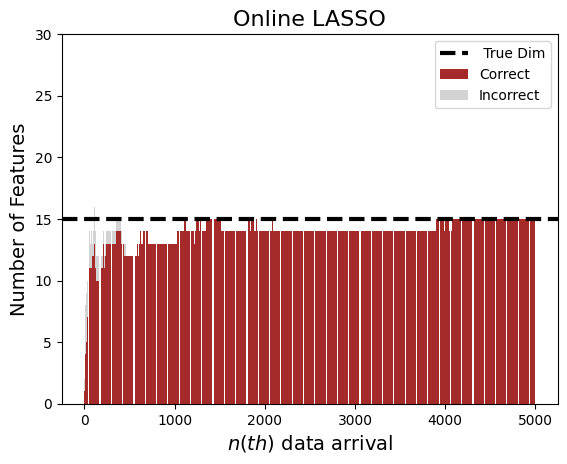

In [97]:
# Call feature bar plot 
util.bar_plot(correct, incorrect, 0,N, p, P, 'Online LASSO')